In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import load_model
import seaborn as sns

In [2]:
!unzip "/content/RGB.zip" -d "/content/RGB/"

Archive:  /content/RGB.zip
   creating: /content/RGB/RGB/test/
   creating: /content/RGB/RGB/test/Humidity_Autumn/
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB47.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB48.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB49.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB50.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB51.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB52.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB53.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB54.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB55.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB56.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB57.png  
  inflating: /content/RGB/RGB/test/Humidity_Autumn/Humidity_RGB58.png  
  inflating: /content

In [3]:
path_train ='/content/RGB/RGB/train'
path_test = '/content/RGB/RGB/test'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path_train, target_size=(224,224), class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(224,224), class_mode='categorical')

Found 786 images belonging to 12 classes.
Found 239 images belonging to 12 classes.


In [4]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(12,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')

    return model

In [8]:
alexnet_seasons = AlexNet(train[0][0].shape[1:])

In [9]:
alexnet_seasons.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 54, 54, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 54, 54, 96)        384       
                                                                 
 activation_5 (Activation)   (None, 54, 54, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 26, 26, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 26, 26, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 26, 26, 256)       1024

In [11]:
alexnet_seasons.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [12]:
# fit the model
# Run the cell. It will take some time to execute
history_alexnet_agriculture = alexnet_seasons.fit(
  train,
  validation_data=test,
  epochs=100,
  steps_per_epoch=len(train),
  validation_steps=len(test)
)    

alexnet_seasons.save('alexnet_seasons_model.h5')
print("model saved to Disk.")

Epoch 1/100
25/25 [==============================] - 31s 560ms/step - loss: 14.3281 - accuracy: 0.0916 - val_loss: 2.5372 - val_accuracy: 0.0837
Epoch 2/100
25/25 [==============================] - 12s 483ms/step - loss: 2.4767 - accuracy: 0.0992 - val_loss: 2.4944 - val_accuracy: 0.0711
Epoch 3/100
25/25 [==============================] - 11s 455ms/step - loss: 2.4685 - accuracy: 0.0827 - val_loss: 2.4906 - val_accuracy: 0.0753
Epoch 4/100
25/25 [==============================] - 12s 481ms/step - loss: 2.4736 - accuracy: 0.0980 - val_loss: 2.4882 - val_accuracy: 0.0879
Epoch 5/100
25/25 [==============================] - 11s 455ms/step - loss: 2.4677 - accuracy: 0.0980 - val_loss: 2.5161 - val_accuracy: 0.0837
Epoch 6/100
25/25 [==============================] - 11s 454ms/step - loss: 2.4632 - accuracy: 0.0967 - val_loss: 2.4962 - val_accuracy: 0.0586
Epoch 7/100
25/25 [==============================] - 14s 584ms/step - loss: 2.4583 - accuracy: 0.1158 - val_loss: 2.5026 - val_accuracy

In [13]:
# dirname = os.path.join(os.path.dirname(__file__))
test_model = load_model('alexnet_seasons_model.h5')

In [14]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    path_test,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


Found 239 images belonging to 12 classes.


In [15]:
Y_preds = test_model.predict(test_data_generator, steps=test_steps_per_epoch)

8/8 [==============================] - 3s 301ms/step


In [16]:
# Get most likely class
predicted_classes = np.argmax(Y_preds, axis=1)

print(test_data_generator.classes)
print(predicted_classes)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]
[ 6  7  2  3  3  2 11  7  1  8 10  1 11  8  6 10  0 11  2 11  3  5  7  3
 11  3 10  2  7  2  9 10  0  4  2  3  2  9  6 11  9  6  7  5  9  8  2  7
 11  3  6  7  6  9 10 10  0  5  3  6  7  7  9  5  0  5  6  9 10  0 10 10
 11  9  7 10 10  6 10  6  7 11 11 11 11  2  6  9  2 1

In [17]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())


In [18]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report) 
print(cmat)
print(acc)

                    precision    recall  f1-score   support

   Humidity_Autumn       0.12      0.05      0.07        20
   Humidity_Spring       0.00      0.00      0.00        20
   Humidity_Summer       0.03      0.05      0.04        19
   Humidity_Winter       0.00      0.00      0.00        20
   Moisture_Autumn       0.00      0.00      0.00        20
   Moisture_Spring       0.08      0.05      0.06        20
   Moisture_Summer       0.12      0.20      0.15        20
   Moisture_Winter       0.00      0.00      0.00        20
Temperature_Autumn       0.00      0.00      0.00        20
Temperature_Spring       0.10      0.10      0.10        20
Temperature_Summer       0.11      0.15      0.12        20
Temperature_Winter       0.09      0.15      0.11        20

          accuracy                           0.06       239
         macro avg       0.05      0.06      0.06       239
      weighted avg       0.05      0.06      0.06       239

[[1 2 3 2 0 0 2 2 2 0 2 4]
 [1 0 4 4 

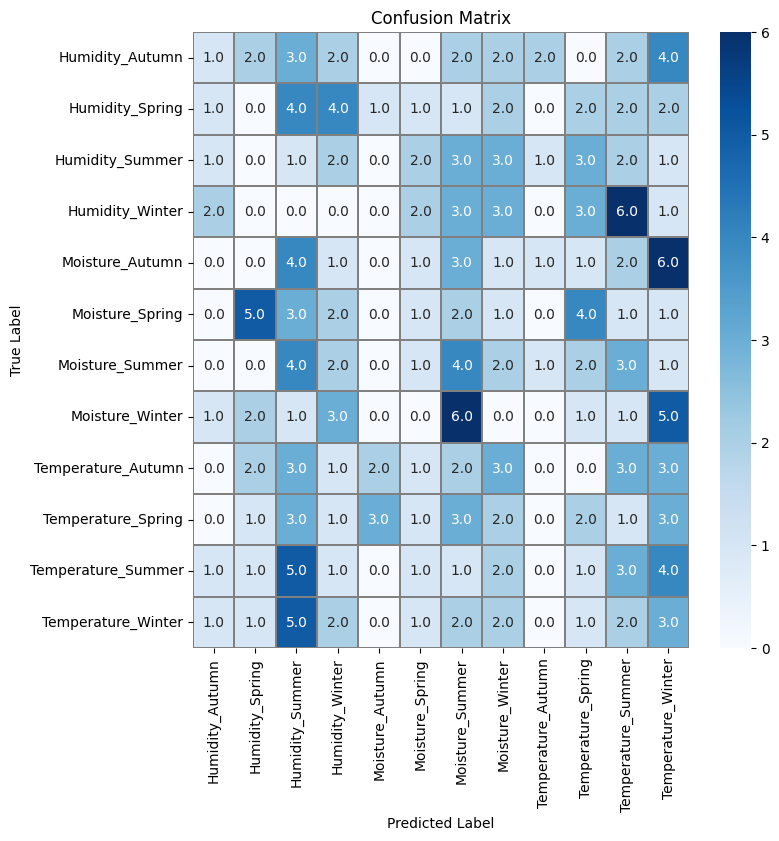

In [22]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(['Humidity_Autumn','Humidity_Spring','Humidity_Summer','Humidity_Winter','Moisture_Autumn','Moisture_Spring','Moisture_Summer','Moisture_Winter','Temperature_Autumn','Temperature_Spring','Temperature_Summer','Temperature_Winter'])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_yticklabels(['Humidity_Autumn','Humidity_Spring','Humidity_Summer','Humidity_Winter','Moisture_Autumn','Moisture_Spring','Moisture_Summer','Moisture_Winter','Temperature_Autumn','Temperature_Spring','Temperature_Summer','Temperature_Winter'])

plt.title("Confusion Matrix")
plt.show()